In [1]:
import pandas as pd

In [2]:
comments_df = pd.read_csv('./comments_with_score.csv',index_col = 0)

In [3]:
comments_df.head()

,article_id,comments,is_reply,neg,neu,pos,compound
0,0.0,What's the point of studying so much ended up ...,0.0,0.000,0.872,0.128,0.7096
1,0.0,No matter what kind of streaming or subject ba...,0.0,0.156,0.760,0.084,-0.8555
2,0.0,Seems to be that the purpose of this system is...,1.0,0.000,0.844,0.156,0.6322
3,0.0,This feels like just another diversion from RE...,0.0,0.045,0.797,0.159,0.8981
4,0.0,Isn’t a “real” issue the boxing of kids into s...,1.0,0.000,0.690,0.310,0.6597


## Topic Modelling (Latent Dirichlet Allocation unigram)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
cvec = CountVectorizer(stop_words='english',max_df=0.98,min_df=3)

In [6]:
comments_cvec = cvec.fit_transform(comments_df['comments'])

In [7]:
#Vocabulary of words
cvec.get_feature_names()

['1990s',
 '1st',
 '20',
 '2024',
 '40',
 '90s',
 'ability',
 'able',
 'abuse',
 'academic',
 'act',
 'acts',
 'actual',
 'actually',
 'affect',
 'affected',
 'age',
 'ago',
 'agree',
 'ah',
 'allow',
 'allows',
 'anti',
 'arts',
 'ask',
 'attitude',
 'average',
 'away',
 'bad',
 'badly',
 'banding',
 'based',
 'batok',
 'belief',
 'believe',
 'belong',
 'benefit',
 'best',
 'better',
 'big',
 'blame',
 'bond',
 'boon',
 'born',
 'boss',
 'bosses',
 'brainwash',
 'breakers',
 'bring',
 'brought',
 'brutally',
 'build',
 'bukit',
 'business',
 'called',
 'care',
 'caste',
 'category',
 'cause',
 'certain',
 'challenging',
 'chan',
 'chance',
 'change',
 'changes',
 'charge',
 'cheaters',
 'cheating',
 'check',
 'chee',
 'child',
 'children',
 'china',
 'chinese',
 'citizen',
 'citizens',
 'civil',
 'class',
 'classes',
 'clean',
 'cleaning',
 'clear',
 'clumsiness',
 'come',
 'coming',
 'comment',
 'comments',
 'common',
 'companies',
 'competition',
 'competitiveness',
 'complacency',


In [8]:
#Model for 2 topics
lda = LatentDirichletAllocation(n_components=2,random_state=42)
lda.fit(comments_cvec)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=2, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [9]:
#Crate a function to print top words for each topic to have a sense of what the topics might represent
def show_top15(lda_model,vec_words):
    '''
    This function takes in an lda fitted model and prints the top 15 words for each topic modelled.
    '''
    for index,topic in enumerate(lda_model.components_):
        print('The top 15 words for topic #{}'.format(index))
        print([vec_words.get_feature_names()[i] for i in topic.argsort()[-15:]])
        print('\n')

In [10]:
#Show top words for each topic
show_top15(lda,cvec)

The top 15 words for topic #0
['change', 'schools', 'like', 'pap', 'time', 'normal', 'school', 'stream', 'people', 'chinese', 'education', 'just', 'good', 'streaming', 'students']


The top 15 words for topic #1
['normal', 'called', 'reform', 'big', 'education', 'government', 'civil', 'restructure', 'world', 'years', 'singaporean', 'bad', 'kids', 'like', 'singapore']




<div class='alert alert-block alert-warning'>
    The two topic seems to both be a mix of politics and education.
</div>

In [11]:
#Model for 3 topics
lda_3 = LatentDirichletAllocation(n_components=3,random_state=42)
lda_3.fit(comments_cvec)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=3, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [12]:
#Show top 15 words for each topic
show_top15(lda_3,cvec)

The top 15 words for topic #0
['just', 'time', 'policies', 'new', 'like', 'need', 'foreign', 'local', 'years', 'change', 'ministers', 'education', 'singapore', 'good', 'pap']


The top 15 words for topic #1
['don', 'sex', 'called', 'education', 'reform', 'world', 'big', 'years', 'government', 'civil', 'restructure', 'singaporean', 'bad', 'like', 'singapore']


The top 15 words for topic #2
['social', 'teachers', 'like', 'chinese', 'schools', 'people', 'school', 'just', 'good', 'kids', 'express', 'stream', 'normal', 'streaming', 'students']




<div class='alert alert-block alert-warning'>
    The first two topics seem to both be about politics while the last seems more distinctly about education.
</div>

In [13]:
#Model for 4 topics
lda_4 = LatentDirichletAllocation(n_components=4,random_state=42)
lda_4.fit(comments_cvec)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [14]:
#Show top 15 words for each topic
show_top15(lda_4,cvec)

The top 15 words for topic #0
['singapore', 'streaming', 'time', 'jobs', 'years', 'foreign', 'don', 'change', 'pap', 'just', 'local', 'ministers', 'chinese', 'new', 'education']


The top 15 words for topic #1
['sex', 'don', 'called', 'world', 'education', 'reform', 'big', 'government', 'years', 'civil', 'restructure', 'singaporean', 'bad', 'like', 'singapore']


The top 15 words for topic #2
['non', 'look', 'chinese', 'like', 'just', 'teachers', 'schools', 'people', 'kids', 'school', 'streaming', 'express', 'stream', 'normal', 'students']


The top 15 words for topic #3
['ong', 'grc', 'change', 'lose', 'subjects', 'parents', 'pap', 'students', 'end', 'election', 'different', 'singapore', 'like', 'streaming', 'good']




In [15]:
#Model for 5 topics
lda_5 = LatentDirichletAllocation(n_components=5,random_state=42)
lda_5.fit(comments_cvec)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [16]:
#Show top 15 words for each topic
show_top15(lda_5,cvec)

The top 15 words for topic #0
['elites', 'parents', 'change', 'years', 'singapore', 'jobs', 'pap', 'chinese', 'foreign', 'ministers', 'new', 'don', 'just', 'education', 'local']


The top 15 words for topic #1
['sex', 'called', 'don', 'big', 'reform', 'world', 'education', 'years', 'civil', 'government', 'restructure', 'singaporean', 'bad', 'like', 'singapore']


The top 15 words for topic #2
['good', 'just', 'non', 'like', 'teachers', 'people', 'chinese', 'schools', 'school', 'streaming', 'kids', 'express', 'stream', 'normal', 'students']


The top 15 words for topic #3
['study', 'level', 'just', 'got', 'end', 'education', 'future', 'subject', 'students', 'ong', 'parents', 'streaming', 'like', 'singapore', 'good']


The top 15 words for topic #4
['mp', 'people', 'like', 'issue', 'need', 'louis', 'lose', 'grc', 'change', 'election', 'ng', 'pap', 'good', 'time', 'streaming']




<div class='alert alert-block alert-warning'>
    Beyond three topics the topics seem to overlap rather strongly. Even with three topics the first two seemed to overlap, but there was a more distinct topic on education with 3 topics.
</div>

In [17]:
#Retrieve the topics of comments as a list
topic_results = lda_3.transform(comments_cvec)

In [18]:
#Add the topics to the DataFrame
comments_df['topic'] = topic_results.argmax(axis=1)

In [19]:
#Check the number of comments for each topic
for i in range(3):
    print('Number of comments under topic {}: '.format(i),len(comments_df[comments_df['topic']==i]))

Number of comments under topic 0:  110
Number of comments under topic 1:  12
Number of comments under topic 2:  143


<div class='alert alert-block alert-info'>
    With only 12 comments under topic 1 and considering how the topics seem to overlap, it would likely be possible to combine topics 0 and 1 as a single topic and have 2 topics (likely politics and education judging from the top 15 words).
</div>

In [20]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [21]:
#Topic and terms visualisation
pyLDAvis.sklearn.prepare(lda_3, comments_cvec, cvec)

C:\Users\kwanw\Anaconda3\envs\tf\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.158556 -0.085728       1        1  37.832300
1      0.186491 -0.052223       2        1  36.633523
0     -0.027935  0.137951       3        1  25.534176, topic_info=    Category       Freq         Term      Total  loglift  logprob
500  Default  62.000000     students  62.000000  30.0000  30.0000
342  Default  37.000000       normal  37.000000  29.0000  29.0000
495  Default  34.000000       stream  34.000000  28.0000  28.0000
154  Default  32.000000      express  32.000000  27.0000  27.0000
253  Default  27.000000         kids  27.000000  26.0000  26.0000
369  Default  26.000000          pap  26.000000  25.0000  25.0000
496  Default  56.000000    streaming  56.000000  24.0000  24.0000
430  Default  21.000000  restructure  21.000000  23.0000  23.0000
28   Default  27.000000          bad  27.000000  22.0000  22.0000
316  Default  19.000000    ministers  19.000000  21.0000  21.0000
39   Default  19.000000          big  19.000000  20.0000  20.0000
474  Default  26.000000  singaporean  26.000000  19.0000  19.0000
422  Default  18.000000       reform  18.000000  18.0000  18.0000
280  Default  14.000000        local  14.000000  17.0000  17.0000
76   Default  20.000000        civil  20.000000  16.0000  16.0000
249  Default  34.000000         just  34.000000  15.0000  15.0000
473  Default  61.000000    singapore  61.000000  14.0000  14.0000
54   Default  16.000000       called  16.000000  13.0000  13.0000
386  Default  12.000000     policies  12.000000  12.0000  12.0000
173  Default  19.000000      foreign  19.000000  11.0000  11.0000
466  Default  15.000000          sex  15.000000  10.0000  10.0000
520  Default  15.000000     teachers  15.000000   9.0000   9.0000
63   Default  22.000000       change  22.000000   8.0000   8.0000
336  Default  17.000000          new  17.000000   7.0000   7.0000
501  Default  14.000000        study  14.000000   6.0000   6.0000
189  Default  45.000000         good  45.000000   5.0000   5.0000
534  Default  22.000000         time  22.000000   4.0000   4.0000
315  Default  11.000000     minister  11.000000   3.0000   3.0000
553  Default  13.000000    unethical  13.000000   2.0000   2.0000
284  Default  13.000000         look  13.000000   1.0000   1.0000
..       ...        ...          ...        ...      ...      ...
467   Topic3   2.814992           sg   3.412588   1.1726  -6.0099
184   Topic3   2.814181      gimmick   3.412640   1.1723  -6.0102
70    Topic3   5.516028        child   6.815602   1.1536  -5.3372
316   Topic3  15.379908    ministers  19.759151   1.1146  -4.3118
369   Topic3  18.815606          pap  26.801222   1.0114  -4.1102
63    Topic3  14.967991       change  22.353460   0.9641  -4.3390
135   Topic3   9.399908     election  12.934866   1.0459  -4.8042
336   Topic3  11.823396          new  17.086237   0.9970  -4.5748
188   Topic3   6.535390        going   8.528022   1.0990  -5.1677
173   Topic3  12.908577      foreign  19.972028   0.9287  -4.4870
196   Topic3   5.340920    graduates   6.863976   1.1143  -5.3695
370   Topic3  10.517228      parents  17.132829   0.8772  -4.6919
333   Topic3  12.715657         need  22.539517   0.7927  -4.5021
282   Topic3   6.384893          lol   9.408007   0.9775  -5.1910
534   Topic3  11.221668         time  22.355503   0.6759  -4.6271
189   Topic3  16.464899         good  45.962082   0.3386  -4.2437
131   Topic3  15.930208    education  46.540666   0.2930  -4.2767
592   Topic3  13.470860        years  38.014009   0.3277  -4.4444
72    Topic3   7.693098        china  13.999989   0.7664  -5.0046
473   Topic3  16.304883    singapore  61.581775   0.0363  -4.2534
83    Topic3   6.153223         come   9.545811   0.9260  -5.2279
246   Topic3   9.127183         jobs  21.926089   0.4887  -4.8336
242   Topic3   6.568509        issue  11.150849   0.8359  -5.1626
249   Topic3  10.896696         just  34.612703   0.2094 

In [22]:
import random

In [23]:
def random_5_comments(topic, col):
    '''
    This function takes in a topic number and the topic column name and prints 5 randomly selected comments.
    '''
    #for reproducibility 
    random.seed(99)
    #randomly pick 5 index positions
    selected = random.sample(range(len(comments_df[comments_df[col]==topic])),5)
   
    #Print the selected indexes 
    for index in selected:
        print(comments_df[comments_df[col]==topic].iloc[index]['comments'])
        print('-----'*20)
        print('\n')

In [24]:
#Print 5 comments from topic 0
random_5_comments(0,'topic')

Back to square one, after 40 years😜
----------------------------------------------------------------------------------------------------


After election, things might change again...
----------------------------------------------------------------------------------------------------


i game u fifty dollars you don't have school going kids now. on?
----------------------------------------------------------------------------------------------------


Can such polls be taken seriously? The majority of dumb local born S'poreans are after all Champion Complainers who have repeatedly returned P@P to power.
----------------------------------------------------------------------------------------------------


The number of local masters, double degrees and degrees jobless are alarming... Surprising foreigners coming in as tourists can land jobs in days.
----------------------------------------------------------------------------------------------------




In [25]:
#Print 5 comments from topic 1
random_5_comments(1,'topic')

To Everyone in this Website, Especially PAP, Opposition Parties & All Singaporean,

To improve our competitiveness in Global Economy , We really must REVAMP our entire school education system , in actual fact, it should have been Done it in over 20 years ago, during the 1990s .

From this website on “ Subject-Based Banding to replace streaming in secondary schools by 2024 by Singapore Government , it has EXPOSE OUT these BIG PROBLEMS in Singapore that had spread over many years .

Unfortunately, our “ MOST EXPENSIVE GOVERNMENT IN THE WHOLE WORLD “ don’t seem to do much on it , though TALK very BIG in Mass Media that our “ MOST EXPENSIVE GOVERNMENT IN THE WHOLE WORLD “ is doing so ! ! !

The PROBLEMS that we are facing now are these , due to the very Harmful Effects of " DON' T CARE " of or , should say, SACRIFICE Professional Ethics & Moral Education for many years :===>

(1). Bad CORORATE CULTURES & Unethical SOCIAL VALUES are widespread in Singapore Business World & Singapore Society

In [26]:
#Print 5 comments from topic 2
random_5_comments(2,'topic')

So sad that in a country as modern as Singapore that pride herself in one race one people , etc thst we talk about segregation. Isnt it better gor he kids ti decide if he prefers a faster thuss express or slower m thus normal himself? Ut is all about nurturung a good character jot how fadt or slow you graduate. Many famous folks also never graduate. In this world...less educated does not mean less successful. Good lord...please do not do this poll.
----------------------------------------------------------------------------------------------------


As long as any school is gov-aided or supported, MOE should insist these schools take in students with non-Express PSLE T-Scores to show that these schools can value-add. Also, this will in the long term help social cohesiveness.
----------------------------------------------------------------------------------------------------


The surest way to travel to the sun is by night!
--------------------------------------------------------------

<div class='alert alert-block alert-info'>
    Judging by the contents of the comments separated via LDA, the comments can largely be clustered around two topics: politics and education. Slightly more than half of the comments were about education,streaming and social segregation while the remainder were focused on politics and the government. 
</div>

## Topic Modelling (Non-Negative Matrix Factorization)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [28]:
tfvec = TfidfVectorizer(stop_words='english',max_df=0.98,min_df=3)

In [29]:
#Vectorize comments
comments_tfvec = tfvec.fit_transform(comments_df['comments'])

In [30]:
#Model for 2 topics
nmf_model = NMF(n_components=2, random_state=42)
nmf_model.fit(comments_tfvec)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=2, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [31]:
#show top 15 words for 2 topics
show_top15(nmf_model,tfvec)

The top 15 words for topic #0
['world', 'don', 'time', 'years', 'pap', 'just', 'school', 'people', 'change', 'education', 'like', 'students', 'singapore', 'streaming', 'good']


The top 15 words for topic #1
['ones', 'looked', 'remember', 'having', 'issue', 'oh', 'mixing', 'classes', 'teachers', 'schools', 'students', 'stream', 'kids', 'express', 'normal']




In [32]:
#Model for 3 topics
nmf_model_3 = NMF(n_components=3, random_state=42)
nmf_model_3.fit(comments_tfvec)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=3, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [33]:
#show top 15 words for 3 topics
show_top15(nmf_model_3,tfvec)

The top 15 words for topic #0
['just', 'new', 'election', 'don', 'singaporean', 'world', 'years', 'ministers', 'people', 'need', 'pap', 'education', 'like', 'change', 'singapore']


The top 15 words for topic #1
['life', 'looked', 'remember', 'having', 'issue', 'oh', 'classes', 'mixing', 'teachers', 'schools', 'students', 'stream', 'kids', 'express', 'normal']


The top 15 words for topic #2
['better', 'social', 'different', 'jc', 'study', 'just', 'based', 'secondary', 'student', 'subject', 'subjects', 'school', 'students', 'good', 'streaming']




In [34]:
#Model for 4 topics
nmf_model_4 = NMF(n_components=4, random_state=42)
nmf_model_4.fit(comments_tfvec)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=4, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [35]:
#show top 15 words for 4 topics
show_top15(nmf_model_4,tfvec)

The top 15 words for topic #0
['bad', 'restructure', 'singaporean', 'government', 'people', 'chinese', 'china', 'foreign', 'don', 'years', 'world', 'education', 'pap', 'like', 'singapore']


The top 15 words for topic #1
['life', 'looked', 'remember', 'having', 'issue', 'oh', 'mixing', 'classes', 'teachers', 'schools', 'students', 'stream', 'kids', 'express', 'normal']


The top 15 words for topic #2
['forced', 'better', 'social', 'jc', 'study', 'just', 'secondary', 'based', 'student', 'subject', 'subjects', 'school', 'students', 'good', 'streaming']


The top 15 words for topic #3
['lose', 'takes', 'agree', 'seriously', 'things', 'gimmick', 'polls', 'time', 'decades', 'need', 'moe', 'ministers', 'election', 'new', 'change']




<div class='alert alert-block alert-warning'>
    The topics from Non-Negative Matrix Factorization do not seem that clearly split, however like LDA, the 3 topic split has one distinct topic and perhaps the other two could be combined into one as well.
</div>

In [36]:
#Retrieve topics of comments
topics_nmf_3 = nmf_model_3.transform(comments_tfvec).argmax(axis=1)

In [37]:
#Append the topic to the DataFrame
comments_df['topics_nmf_3'] = topics_nmf_3

In [38]:
#Check the number of comments for each topic
for i in range(3):
    print('Number of comments under topic {}: '.format(i),len(comments_df[comments_df['topics_nmf_3']==i]))

Number of comments under topic 0:  129
Number of comments under topic 1:  47
Number of comments under topic 2:  89


In [39]:
#Print 5 comments from topic 0
random_5_comments(0,'topics_nmf_3')

The coming election will be challenging for PAP. They need to consider if they lose the GRC, they going to lose the heavy weight ministers. GRC will be good for opposition this time but not for PAP. The chance of losing another GRC is high. They already lose heavy weight George Yeo.
----------------------------------------------------------------------------------------------------


Most of the pap mps don't even understand Politics. They are just paid pawns to do the "kind, Mr. Nice", role.
----------------------------------------------------------------------------------------------------


Sounds like the GRC system!
----------------------------------------------------------------------------------------------------


Pls look at how scholars are produced. And should they drive policies when they are so stuck up. And look at how military are being parachuted.
----------------------------------------------------------------------------------------------------


Back to square one, a

In [40]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

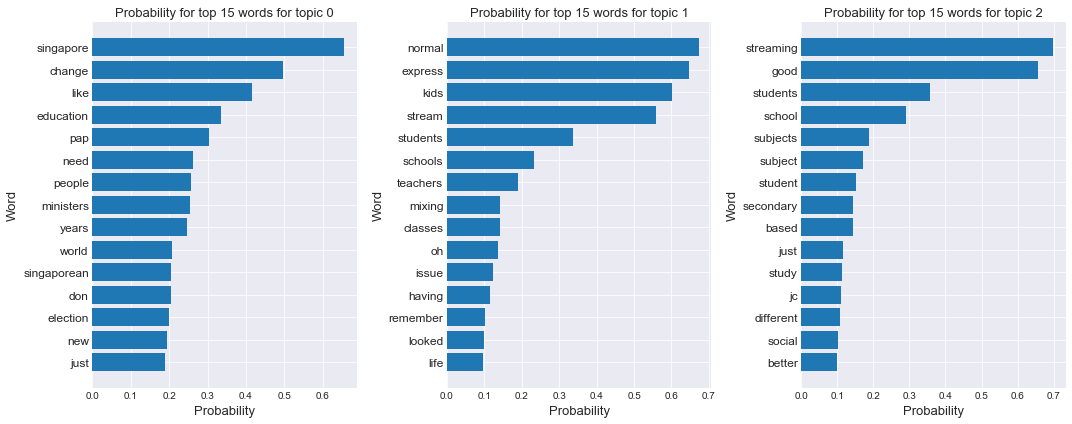

In [49]:
#For the top 15 words of each topic, plot the probabilities they are generated by that topic 
plt.subplots(1,3,figsize=(15,6))

for i in range(3):
    topic_df = pd.DataFrame({'Word':tfvec.get_feature_names(),'Probability':nmf_model_3.components_[i]})
    topic_df_15 = topic_df.sort_values('Probability',ascending=False).head(15)
    
    plt.subplot(1,3,i+1)
    plt.barh(y=topic_df_15.sort_values('Probability')['Word'],width=topic_df_15.sort_values('Probability')['Probability'])

    plt.title('Probability for top 15 words for topic {}'.format(i),fontsize=13)
    plt.ylabel('Word',fontsize=13)
    plt.yticks(fontsize=12)
    plt.xlabel('Probability',fontsize=13)
    plt.tight_layout()

In [42]:
#Print 5 comments from topic 1
random_5_comments(1,'topics_nmf_3')

In fact, is the Principal & teachers in my school who differentiate the Express & Normal...I was in the Normal stream...Principal & teachers are the ones who tell the Express to stay away from Normal Students else will become like us.
----------------------------------------------------------------------------------------------------


Ok lo, let them stream to express lo. These students are molded by government and prepare them to be followers. Always follow the system, rigid and straight.

While normal students dare to do things and try things differently. Seen many bosses from the normal stream employing dozens of local U grads lol
----------------------------------------------------------------------------------------------------


Secondary kids may not be ready modular system. They may even forget to attend lessons. Timetabling would become overwhelmingly complex. Teachers will have to contend with very diverse ability students. Oh well....
---------------------------------------

In [43]:
#Print 5 comments from topic 2
random_5_comments(2,'topics_nmf_3')

You can mix them but does not mean there will be integration.
----------------------------------------------------------------------------------------------------


social stigma is unavoidable. even without streaming.
in top school, a student from A class will look down on students from the last class.
and the leech will look down on the poor.
anyway, its tuition. those who can afford the best tutors end up with good grades.
and they are from the leeches.
how many from the lower income have good educational outcomes?
More
----------------------------------------------------------------------------------------------------


@willie le chien courant
Not yet, right! But the idea remains sound. Try it!
----------------------------------------------------------------------------------------------------


Streaming is GOOD. No good student should be forced to mix with those trouble-making, parang-wielding and noise-generating students; you just can't focus and concentrate in class, and all 

<div class='alert alert-block alert-warning'>
    Judging from the comments from each topic, topic 0 seems focused on politics while topics 1 and 2 are focused on education and social segregation. If topics 1 and 2 were to be combined, it seems like the results of both LDA and NMF would be rather similar, with a split of ~120/140 for politics/education
</div>

In [44]:
#Consolidate topics into just 2 topics of Politics and education/Society
topics_lda_2 = ['Politics' if num==0 or num==1 else 'Education/Society' for num in lda_3.transform(comments_cvec).argmax(axis=1)]
topics_nmf_2 = ['Politics' if num==0 else 'Education/Society' for num in nmf_model_3.transform(comments_tfvec).argmax(axis=1)]

In [45]:
#Add the topics to the DataFrame
comments_df['topics_lda_2'] = topics_lda_2
comments_df['topics_nmf_2'] = topics_nmf_2

In [46]:
#Check the percentage comments that were clustered under the same topic by both models
len(comments_df[comments_df['topics_lda_2']==comments_df['topics_nmf_2']])/len(comments_df)

0.7849056603773585

In [47]:
#Take a look at the comments where the models differed on selected topic
random.seed(99)
diff_topics = comments_df[comments_df['topics_lda_2']!=comments_df['topics_nmf_2']]
num_list = random.sample(range(len(diff_topics)),10)

for num in num_list:
    print(diff_topics.iloc[num]['comments'])
    print()
    print('LDA Topic: ',diff_topics.iloc[num]['topics_lda_2'])
    print('NMF Topic: ',diff_topics.iloc[num]['topics_nmf_2'])
    print()
    print('-----'*20)

You are totally wrong. I have 2 boys and they mixed with friends from all walks of life. To tell the truth, it does benefit them and build up their EQ which people like you will not be able to understand.

LDA Topic:  Education/Society
NMF Topic:  Politics

----------------------------------------------------------------------------------------------------
I always vote opposite my mind to confuse all. Specially polls related to polictic

LDA Topic:  Education/Society
NMF Topic:  Politics

----------------------------------------------------------------------------------------------------
I agreed that they should review as we have the most rigid school system in the world. It does not motivate learning, creativities and curiousities. It just produce exam smart ppl. Not scientist, inventors, thinkers and so on. If we can produce these ppl. I say we achieve another great success in our education.

LDA Topic:  Education/Society
NMF Topic:  Politics

--------------------------------------

<div class='alert alert-block alert-info'>
    Both LDA and NMF produced similar clustering for majority of the comments, at about 78%. Looking at some of the comments where they disagreed, there was no clear disntinction between which model was more accurate as the selected topic for LDA was more appropriate for some but for others it was the topic from NMF. Some comments did not really belong to either topics. 
</div>